In [96]:
import pandas as pd
import sqlalchemy as db
from matplotlib import pyplot as plt
import seaborn as sns
import functions as f
import statsmodels.formula.api as smf
%matplotlib inline

In [67]:
engine = db.create_engine('sqlite:///stocks_formatted.db')

In [68]:
df_prices = pd.read_sql_table('price_close', con=engine)

In [69]:
df_companies = pd.read_sql_table('company', con=engine)

In [70]:
cosine_df = pd.read_csv('lowestCosine.csv')

calculate 8 month percentagre change in price from jan

In [71]:
df_prices.set_index('date', inplace=True)
df_prices.drop(columns=['index'], inplace=True)

In [72]:
df_prices.tail()

,MMM,AOS,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AMD,...,WU,WY,WHR,WMB,WYNN,XEL,XRX,XLNX,XYL,YUM
date,,,,,,,,,,,,,,,,,,,,,
2014-01-09,136.45,52.48,39.27,51.22,82.95,18.300,123.50,59.09,113.55,4.09,...,17.06,31.00,159.01,39.25,204.77,27.82,12.05,45.78,34.63,75.05
2014-01-08,136.63,52.15,39.20,50.36,82.15,18.340,110.03,58.90,112.30,4.18,...,17.42,30.82,157.60,39.16,205.29,27.71,12.08,45.91,34.49,76.53
2014-01-07,137.65,52.75,38.85,50.49,81.52,18.315,109.44,58.97,113.18,4.18,...,17.44,31.11,154.58,39.01,201.51,27.82,12.19,45.52,34.51,76.56
2014-01-06,137.63,53.27,39.15,50.39,80.54,18.080,106.28,58.12,111.80,4.13,...,17.06,31.02,154.45,38.40,195.86,27.35,12.09,45.42,34.41,75.50
2014-01-03,138.45,53.31,38.64,52.30,81.40,18.290,108.15,59.16,112.88,4.00,...,16.92,31.34,156.90,38.03,196.00,27.50,11.99,45.62,34.47,75.56


In [73]:
df_returns = f.transform_to_august_returns(df_prices)

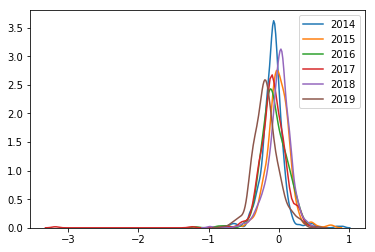

In [9]:
for col in df_returns.columns:
    sns.kdeplot(df_returns[col])

In [10]:
sp_500_df = pd.read_csv('sp500_daily.csv')

In [11]:
sp_500_df.set_index(['Date'], inplace= True)

In [12]:
sp_500_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,2774270000
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020,3294850000
2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005,3511750000
2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,1837.489990,3652140000
2014-01-09,1839.000000,1843.229980,1830.380005,1838.130005,1838.130005,3581150000


In [13]:
nasdaq = pd.read_csv('csv/NASDAQ.csv')
amex = pd.read_csv('csv/AMEX.csv')
nyse = pd.read_csv('csv/NYSE.csv')

In [14]:
df = pd.concat([nasdaq, amex, nyse])

In [15]:
df.set_index('Symbol', inplace = True)

In [16]:
df.dtypes

Name              object
LastSale         float64
MarketCap         object
IPOyear          float64
Sector            object
industry          object
Summary Quote     object
Unnamed: 8       float64
dtype: object

In [17]:
df.drop(columns = ['LastSale', 'IPOyear', 'Unnamed: 8', 'Summary Quote'], inplace=True)

In [18]:
df.dropna(inplace=True)

In [50]:
df.MarketCap = pd.to_numeric(df.MarketCap)

In [54]:
import numpy as np
df.MarketCap = np.log(df.MarketCap)

In [76]:
df_returns = df_returns.join(df, how='left')

In [94]:
df_returns = df_returns.join(pd.get_dummies(df_returns.Sector), how='left')

In [97]:
df_returns['WorstReturns'] = 0

In [98]:
df_returns.columns

Index(['2014', '2015', '2016', '2017', '2018', '2019', 'Name', 'MarketCap',
       'Sector', 'industry', 'Basic Industries', 'Capital Goods',
       'Consumer Durables', 'Consumer Non-Durables', 'Consumer Services',
       'Energy', 'Finance', 'Health Care', 'Miscellaneous', 'Public Utilities',
       'Technology', 'Transportation', 'WorstReturns'],
      dtype='object')

In [106]:
df_returns.Transportation.shape

(462,)

In [113]:
f = 'WorstReturns~Transportation+MarketCap'
model = smf.ols(f, data=df_returns).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           WorstReturns   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     3.357
Date:                Mon, 15 Jul 2019   Prob (F-statistic):             0.0357
Time:                        16:32:32   Log-Likelihood:                -262.26
No. Observations:                 457   AIC:                             530.5
Df Residuals:                     454   BIC:                             542.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1252      0.066      1.889      0.060      -0.005       0.255
Transportation    -0.1822      0.117     -1.557      0.120      -0.412       0.048
MarketCap          0.0394      0.019      2.061      0.040       0.002       0.077
==============================================================================
Omnibus:                       85.793   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.687
Skew:                           1.124   Prob(JB):                     1.85e-23
Kurtosis:                       2.334   Cond. No.                         20.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
df_returns.WorstReturns = df_returns.WorstReturns.map({True:1,False:0})